<a href="https://colab.research.google.com/github/nrysam/UCL22_23/blob/main/UEFA_Champions_League_2022_23_Best_Goalkeeper_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

In [16]:
#the data comes in csv files, we need to read using pandas.

df_agk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl advanced goalkeeping.csv')
df_keeper = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goalkeeper.csv')
df_defense = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl defensive actions.csv')
df_passing = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl passing.csv')
df_passtype = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl pass types.csv')
df_possession = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl possession.csv')
df_goalsc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goal and shot creation.csv')
df_shooting = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl shooting.csv')
df_stdstats = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl standard stats.csv')
df_misc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl miscellanous.csv')
df_playtime = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl player playing time.csv')

In [17]:
#Check the UCL Advanced Goalkeeping data to see if there is some abnormalities

df_agk.head(30)

,Player,Nationality,Position,Club,Age,Born,90s,GA,PKA,FK,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Antonio Adán,ESP,GK,Sporting CP,35,1987,4.2,5,1,0,...,30.5,35,51.4,37,82,9,11,3,0.71,9.2
1,Alisson,BRA,GK,Liverpool,29,1992,8,12,1,0,...,26.5,37,24.3,31.6,56,7,12.5,10,1.25,17.4
2,Kepa Arrizabalaga,ESP,GK,Chelsea,27,1994,9,8,0,0,...,30,46,56.5,44.2,88,6,6.8,10,1.11,17.3
3,Janis Blaswich,GER,GK,RB Leipzig,31,1991,5.9,11,2,0,...,25.6,35,14.3,26.8,83,5,6,4,0.68,14.5
4,Yassine Bounou,MAR,GK,Sevilla,31,1991,4,12,0,0,...,28.5,43,53.5,43.6,53,6,11.3,4,1,11.4
5,Josh Cohen,USA,GK,Maccabi Haifa,29,1992,6,21,0,1,...,32.5,39,43.6,34.6,82,4,4.9,8,1.33,17.2
6,Diogo Costa,POR,GK,Porto,22,1999,8,8,1,0,...,36.1,48,58.3,46.7,117,9,7.7,8,1,13.6
7,Thibaut Courtois,BEL,GK,Real Madrid,30,1992,10,11,0,1,...,30,54,44.4,42.9,134,9,6.7,5,0.5,11.5
8,Marko Dmitrović,SRB,GK,Sevilla,30,1992,2,0,0,0,...,32.7,9,66.7,48.6,20,2,10,0,0,7.8
9,Gianluigi Donnarumma,ITA,GK,Paris S-G,23,1999,8,10,1,0,...,25.1,46,19.6,23.7,99,2,2,8,1,13.3


In [18]:
#Now there is a row that is abnormal. We need to remove it

df_agk = df_agk[df_agk['Age'].apply(lambda x: str(x).isdigit())]
df_agk

,Player,Nationality,Position,Club,Age,Born,90s,GA,PKA,FK,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Antonio Adán,ESP,GK,Sporting CP,35,1987,4.2,5,1,0,...,30.5,35,51.4,37,82,9,11,3,0.71,9.2
1,Alisson,BRA,GK,Liverpool,29,1992,8,12,1,0,...,26.5,37,24.3,31.6,56,7,12.5,10,1.25,17.4
2,Kepa Arrizabalaga,ESP,GK,Chelsea,27,1994,9,8,0,0,...,30,46,56.5,44.2,88,6,6.8,10,1.11,17.3
3,Janis Blaswich,GER,GK,RB Leipzig,31,1991,5.9,11,2,0,...,25.6,35,14.3,26.8,83,5,6,4,0.68,14.5
4,Yassine Bounou,MAR,GK,Sevilla,31,1991,4,12,0,0,...,28.5,43,53.5,43.6,53,6,11.3,4,1,11.4
5,Josh Cohen,USA,GK,Maccabi Haifa,29,1992,6,21,0,1,...,32.5,39,43.6,34.6,82,4,4.9,8,1.33,17.2
6,Diogo Costa,POR,GK,Porto,22,1999,8,8,1,0,...,36.1,48,58.3,46.7,117,9,7.7,8,1,13.6
7,Thibaut Courtois,BEL,GK,Real Madrid,30,1992,10,11,0,1,...,30,54,44.4,42.9,134,9,6.7,5,0.5,11.5
8,Marko Dmitrović,SRB,GK,Sevilla,30,1992,2,0,0,0,...,32.7,9,66.7,48.6,20,2,10,0,0,7.8
9,Gianluigi Donnarumma,ITA,GK,Paris S-G,23,1999,8,10,1,0,...,25.1,46,19.6,23.7,99,2,2,8,1,13.3


In [19]:
#Check All the columns in UCL Passing Data.
print(df_passing.columns)

#The Column name 'Club ' has space in it. We need to rename it to 'Club' in order
df_passing= df_passing.rename(columns={'Club ': 'Club'})

Index(['Player', 'Nationality', 'Position', 'Club ', 'Age', 'Born', '90s',
       'Total Passes completed', 'Total Passes attempted',
       'Total Passes completion %', 'Total passing distance',
       'Progressive passing distance', 'Passes attempted (short)',
       'Passes completed (short)', 'Passes completed (short) %',
       'Passes attempted (medium)', 'Passes completed (medium)',
       'Passes completed (medium) %', 'Passes attempted (long)',
       'Passes completed (long)', 'Passes completed (long) %', 'Assists',
       'Expected Assist Goals (xAG)', 'xA', 'A-xAG', 'Key Passes',
       'Passes into Final third', 'Passes into Penalty Area',
       'Crosses into Penalty Area', 'Progressive passes'],
      dtype='object')


In [20]:
dfjoin_gk = [df_agk, df_keeper, df_defense, df_passing, df_possession]

# Merge DataFrames with an empty string as suffix for duplicates
import functools as ft

# Merge DataFrames with custom suffixes for duplicates
suffixes = ['_passing', '_possession', '_agk', '_keeper', '_defense']

# Define a function to merge with a specific suffix
def merge_with_suffix(left, right, suffix):
    return pd.merge(left, right, on=['Player', 'Position', 'Club'], suffixes=('', suffix))

# Use functools.partial to create a partially applied function
merge_with_suffix_partial = ft.partial(merge_with_suffix, suffix=suffixes[0])

# Apply the merge function iteratively to the list of DataFrames
df_gk = ft.reduce(merge_with_suffix_partial, dfjoin_gk[1:], dfjoin_gk[0])

# Drop duplicate columns with original suffixes
columns_to_drop = [col for col in df_gk.columns if col.endswith(('_passing', '_possession', '_agk', '_keeper', '_defense'))]
df_gk = df_gk.drop(columns=columns_to_drop)

In [22]:
print(df_gk.dtypes)

Player                         object
Nationality                    object
Position                       object
Club                           object
Age                            object
                                ...  
Carries into penalty area       int64
Miscontrols                     int64
Dispossessed                    int64
Passes received                 int64
Progressive passes received     int64
Length: 109, dtype: object


In [28]:
#We need some of the data above to be float.
df_gk[['PSxG+/-','Stp','Stp%','#OPA/90','AvgDist']] = df_gk[['PSxG+/-','Stp','Stp%','#OPA/90','AvgDist']].astype(float)
df_gk[['PSxG+/-','Stp','Stp%','#OPA/90','AvgDist']].dtypes

PSxG+/-    float64
Stp        float64
Stp%       float64
#OPA/90    float64
AvgDist    float64
dtype: object

In [29]:
# Renaming columns for better understanding

df_gk = df_gk.rename(columns = {'Stp':'CrossStp','Stp%':'CrossStp%'})

In [32]:
gk_metrics = [
    'Saves',
    'Save%',
    'CS',
    'CS%',
    'PKsv',
    'PSxG+/-',
    '#OPA/90',
    'AvgDist',
    'CrossStp',
    'CrossStp%',
    'Clearances',
    'Errors',
    'Total Passes completion %',
    'Passes completed (long) %',
    'Key Passes',
    'Passes into Final third',
    'Touches',
    'Miscontrols',
    'Dispossessed',
    'Passes received'
]

In [33]:
def process_player_data(df, position, metrics):
    """
    Filters and processes player data for a given position.

    Args:
    df (DataFrame): The input DataFrame containing player data.
    position (str): The position of players to filter (e.g., 'FW').
    metrics (list): List of metrics/columns to include in the output.

    Returns:
    DataFrame: Processed DataFrame for the given position.
    """
    # Filter and fill missing values

    # Filter the DataFrame based on position and select relevant columns
    df_filtered = df[df['Position'] == position][['Player', 'Position', 'Club'] + metrics]

    # Handle missing values
    df_filtered.fillna(0, inplace=True)

    return df_filtered

# Usage
df_gk = process_player_data(df_gk, 'GK', gk_metrics)
display(df_gk)

,Player,Position,Club,Saves,Save%,CS,CS%,PKsv,PSxG+/-,#OPA/90,...,Clearances,Errors,Total Passes completion %,Passes completed (long) %,Key Passes,Passes into Final third,Touches,Miscontrols,Dispossessed,Passes received
0,Antonio Adán,GK,Sporting CP,16,81.0,2,40.0,0,1.1,0.71,...,4,1,69.9,35.1,0,0,235,0,0,119
1,Alisson,GK,Liverpool,15,60.7,3,37.5,1,0.6,1.25,...,1,1,88.3,71.1,0,6,284,0,0,178
2,Kepa Arrizabalaga,GK,Chelsea,27,77.1,3,33.3,0,1.6,1.11,...,2,0,72.9,47.2,0,1,288,0,0,152
3,Janis Blaswich,GK,RB Leipzig,20,71.0,2,40.0,0,-0.8,0.68,...,2,0,83.3,43.1,0,4,280,0,0,191
4,Yassine Bounou,GK,Sevilla,14,53.8,0,0.0,0,-2.8,1.00,...,3,2,79.8,55.2,0,1,224,1,0,123
5,Josh Cohen,GK,Maccabi Haifa,22,50.0,1,16.7,0,-2.3,1.33,...,2,0,73.8,46.2,0,3,164,0,0,56
6,Diogo Costa,GK,Porto,28,81.6,4,50.0,3,3.7,1.00,...,3,0,72.6,52.8,1,9,400,0,0,246
7,Thibaut Courtois,GK,Real Madrid,41,79.2,5,50.0,1,5.5,0.50,...,3,1,79.2,49.0,0,2,400,1,0,234
8,Marko Dmitrović,GK,Sevilla,4,100.0,2,100.0,0,0.9,0.00,...,0,0,67.1,31.4,0,1,76,0,0,50
9,Gianluigi Donnarumma,GK,Paris S-G,26,74.3,0,0.0,0,1.1,1.00,...,7,1,82.8,40.0,0,0,261,0,0,131


<ipython-input-34-afa26b57b313>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


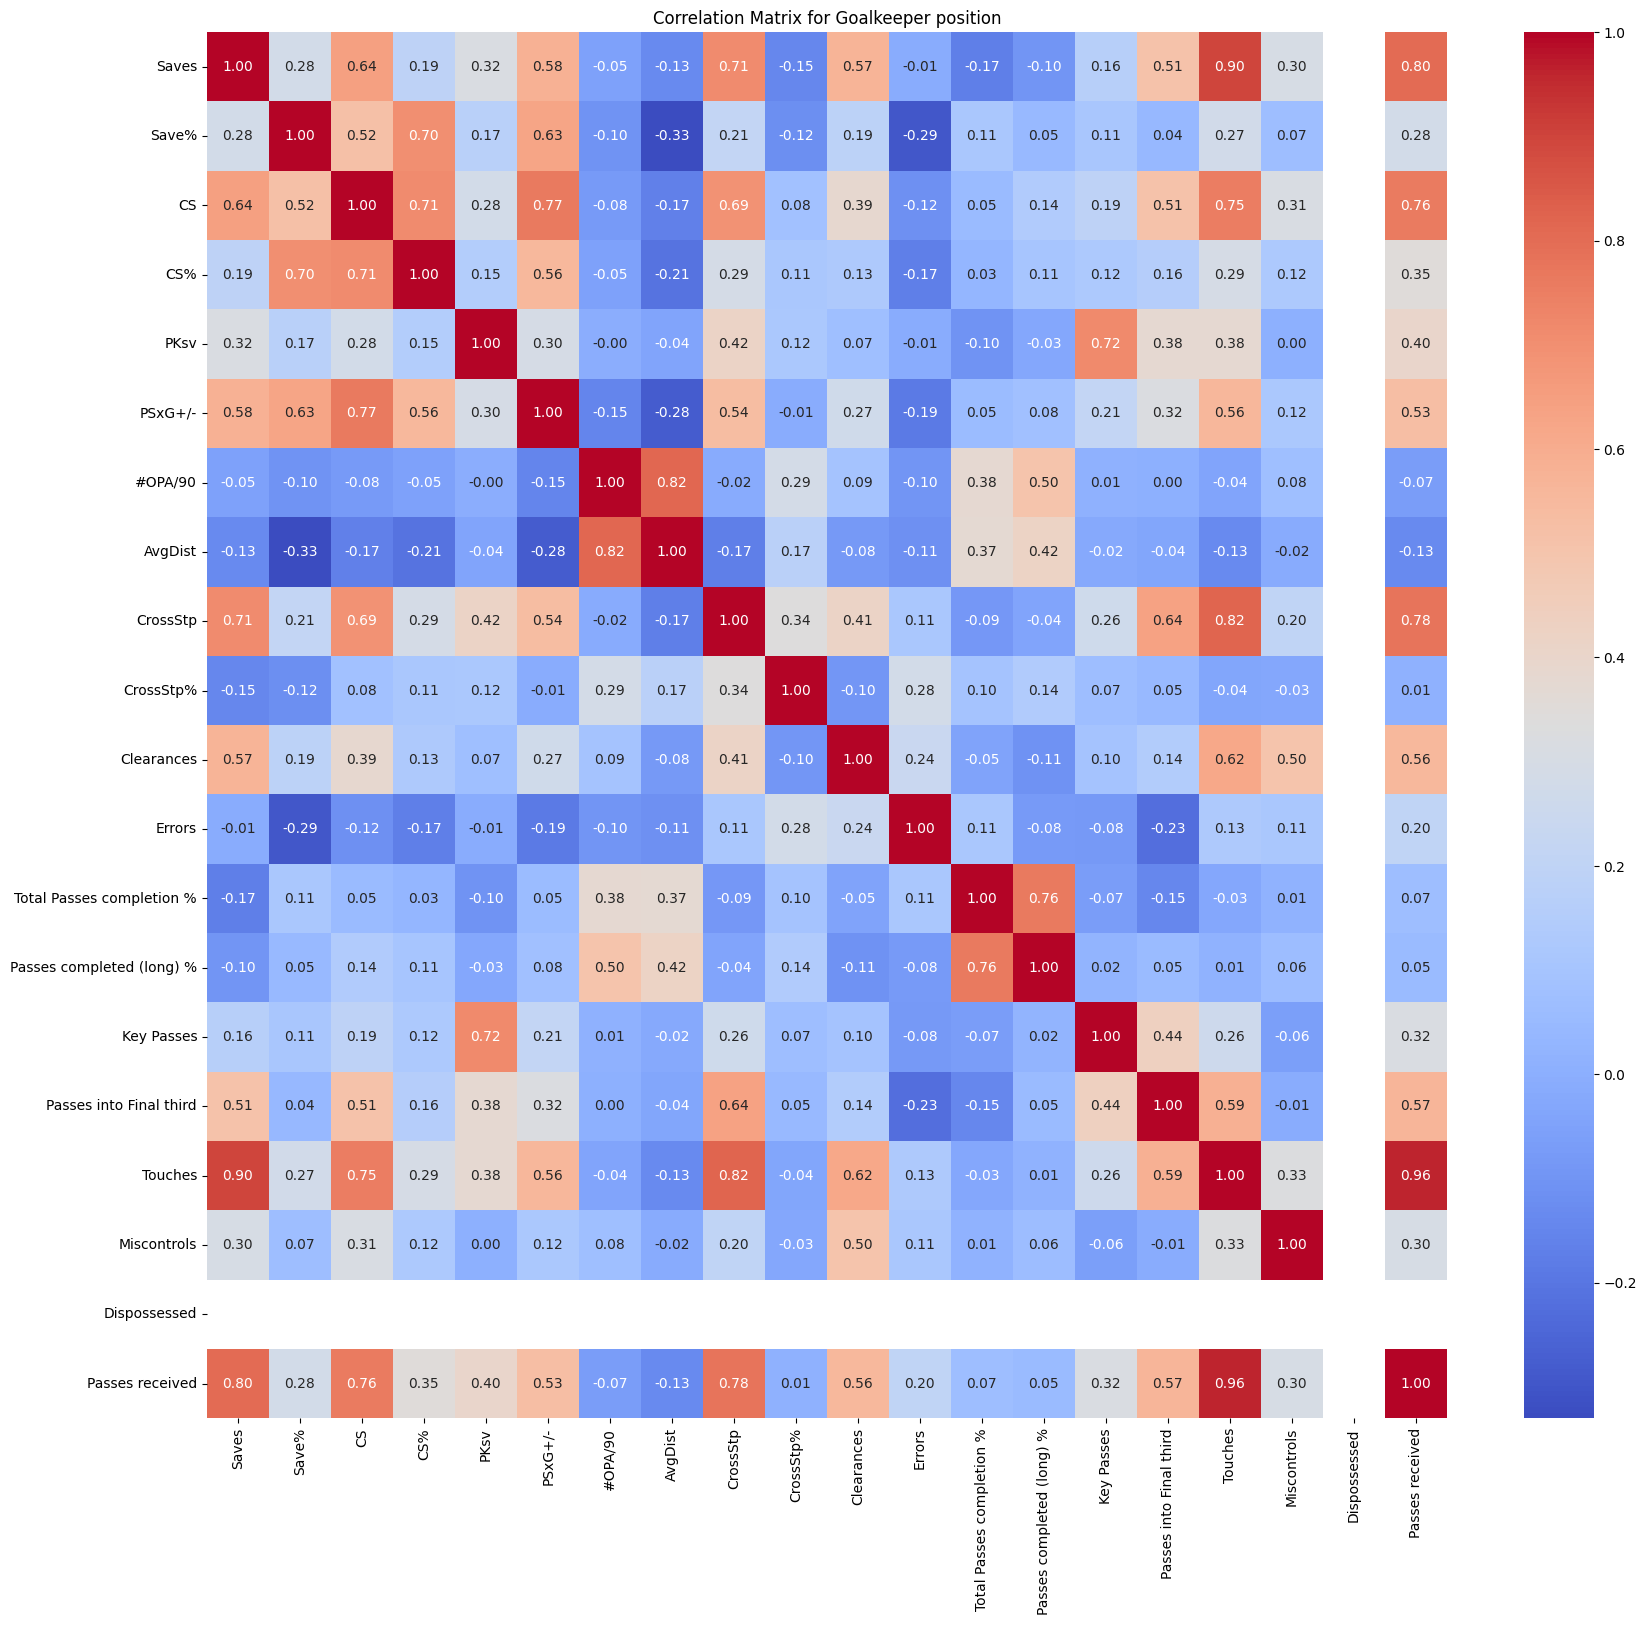

None

In [34]:
#visualization for correlation
def plot_correlation_matrix(data, position_title):
    corr_matrix = data.corr()
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {position_title} position')
    plt.show()

# Usage
display(plot_correlation_matrix(df_gk, 'Goalkeeper'))

In [35]:
# Define the metrics for analysis
gk_metrics_for_analysis = df_gk.columns.difference(['Player', 'Position', 'Club'])

# Reset index for continuity
df_gk = df_gk.reset_index(drop=True)

In [36]:
#Function for Normalizing and Applying Weights
def normalize_and_weight(df, metrics, weights):
    # Normalize metrics
    for metric in metrics:
        min_val = df[metric].min()
        max_val = df[metric].max()
        df[metric] = (df[metric] - min_val) / (max_val - min_val)

    # Apply weights
    for metric in metrics:
        if metric in weights:
            df[metric] *= weights[metric]

    return df

In [37]:
#Function for Standard Scaling
from sklearn.preprocessing import StandardScaler

def standard_scale(df, metrics):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[metrics])
    scaled_df = pd.DataFrame(scaled_data, columns=metrics)
    scaled_df[['Player', 'Position', 'Club']] = df[['Player', 'Position', 'Club']]
    return scaled_df

In [39]:
# Define weights for each metric for GK position
gk_metric_weights = {
    'Saves' : 10,
    'Save%' : 15,
    'CS' : 10,
    'CS%' : 10,
    'PKsv' : 3,
    'PSxG+/-' : 15,
    '#OPA/90' : 5,
    'AvgDist' : 5,
    'CrossStp' : 3,
    'CrossStp%' : 3,
    'Clearances' : 3,
    'Errors' : -5,
    'Total Passes completion %' : 5,
    'Passes completed (long) %' : 5,
    'Key Passes' : 3,
    'Passes into Final third' : 3,
    'Touches' : 3,
    'Miscontrols' : -3,
    'Dispossessed' : -3,
    'Passes received' : 3
}

In [41]:
#Applying both methods for data processing for Goalkeeper
df_gk_normalized_weighted = normalize_and_weight(df_gk.copy(), gk_metrics, gk_metric_weights)
df_gk_standardized = standard_scale(df_gk, gk_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_gk_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_gk_normalized_weighted.head())

Standard Scaler DataFrame:
      Saves     Save%        CS       CS%      PKsv   PSxG+/-   #OPA/90  \
0 -0.038076  0.728979  0.224592  0.469575 -0.441726  0.204652 -0.386955   
1 -0.136273 -0.713750  0.774841  0.375460  1.361989 -0.038745  0.491161   
2  1.042086  0.451805  0.774841  0.217347 -0.441726  0.448048  0.263501   
3  0.354710  0.018275  0.224592  0.469575 -0.441726 -0.720255 -0.435739   
4 -0.234469 -1.204136 -0.875907 -1.036261 -0.441726 -1.693840  0.084626   

    AvgDist  CrossStp  CrossStp%  ...  Passes completed (long) %  Key Passes  \
0 -1.043547  1.824595   1.266576  ...                  -1.290947   -0.144338   
1  0.643087  1.164779   1.630507  ...                   1.628204   -0.144338   
2  0.622518  0.834870   0.247572  ...                  -0.309787   -0.144338   
3  0.046594  0.504962   0.053475  ...                  -0.642246   -0.144338   
4 -0.591036  0.834870   1.339362  ...                   0.338913   -0.144338   

   Passes into Final third   Touches  Mis

In [42]:
def calculate_top_players(df, metrics):
    """
    Calculate and return the top n players based on total score.

    :param df: DataFrame containing player data
    :param metrics: list of metric columns to consider for total score
    :param top_n: number of top players to return
    :return: DataFrame with top n players
    """
    # Calculate total score
    df['total_score'] = df[metrics].sum(axis=1)

    # Sort by total score in descending order
    return df.sort_values(by='total_score', ascending=False)

# Calculate top GKs using Standard Scaler
top_gk_standardized = calculate_top_players(df_gk_standardized, gk_metrics_for_analysis)

# Calculate top GKs using Weighted Metrics
top_gk_weighted = calculate_top_players(df_gk_normalized_weighted, gk_metrics_for_analysis)

# Display the top 5 GKs for each method
print("Top 5 Goalkeepers - StandardScaler Method:")
print(top_gk_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Goalkeepers - Weighted Metrics Method:")
print(top_gk_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Goalkeepers - StandardScaler Method:
              Player Position             Club  total_score
6        Diogo Costa       GK            Porto    26.000017
33       André Onana       GK            Inter    22.909245
7   Thibaut Courtois       GK      Real Madrid    17.988537
10           Ederson       GK  Manchester City    15.408721
1            Alisson       GK        Liverpool    12.090994

Top 5 Goalkeepers - Weighted Metrics Method:
              Player Position             Club  total_score
33       André Onana       GK            Inter    73.695361
6        Diogo Costa       GK            Porto    62.615773
10           Ederson       GK  Manchester City    57.979183
7   Thibaut Courtois       GK      Real Madrid    55.332292
30    Simon Mignolet       GK      Club Brugge    53.176496


In [44]:
# Linear transformation function
def linear_transform(x, min_x, max_x, new_min, new_max):
    return (x - min_x) / (max_x - min_x) * (new_max - new_min) + new_min

def combine_and_select_top_players(df_standardized, df_weighted, original_df, metrics, top_n=5):
    """
    Combine scores from standardized and weighted data, and select top n players.

    :param df_standardized: DataFrame with standardized scores
    :param df_weighted: DataFrame with weighted scores
    :param original_df: Original DataFrame with player details
    :param metrics: list of metric columns
    :param top_n: number of top players to return
    :return: DataFrame with top n players based on combined score
    """
    # Find the min and max values for linear transformation
    min_standardized = df_standardized['total_score'].min()
    max_standardized = df_standardized['total_score'].max()
    min_weighted = df_weighted['total_score'].min()
    max_weighted = df_weighted['total_score'].max()

    # Apply linear transformation
    df_weighted['total_score_transformed'] = df_weighted['total_score'].apply(
        lambda x: linear_transform(x, min_weighted, max_weighted, min_standardized, max_standardized)
    )

    # Combine scores
    combined_df = original_df.copy()
    combined_df['score'] = (df_standardized['total_score'] + df_weighted['total_score_transformed']) / 2

    # Select and return top players
    return combined_df.sort_values(by='score', ascending=False)

# Use the function for Goalkeeper position
top_gk = combine_and_select_top_players(top_gk_standardized, top_gk_weighted, df_gk, gk_metrics_for_analysis)
print("Top 5 Goalkeepers:")
print(top_gk[['Player', 'Club', 'Position', 'score']].head(5))

Top 5 Goalkeepers:
              Player             Club Position      score
33       André Onana            Inter       GK  24.454631
6        Diogo Costa            Porto       GK  22.381512
7   Thibaut Courtois      Real Madrid       GK  15.997045
10           Ederson  Manchester City       GK  15.571590
30    Simon Mignolet      Club Brugge       GK  11.883356


In [45]:
def plot_top_players(df, top_n, position_title, x_label='score', y_label='Player'):
    """
    Create a bar plot for the top N players based on their score.

    :param df: DataFrame containing players and their scores.
    :param top_n: Number of top players to display.
    :param position_title: Title of the position (e.g., 'Centre Forwards').
    :param x_label: Label for the x-axis.
    :param y_label: Label for the y-axis.
    """
    top_players = df.head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_label, y=y_label, data=top_players, palette="viridis")
    plt.title(f'Top {top_n} {position_title} by {x_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

<ipython-input-45-ca94775d0034>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_label, y=y_label, data=top_players, palette="viridis")


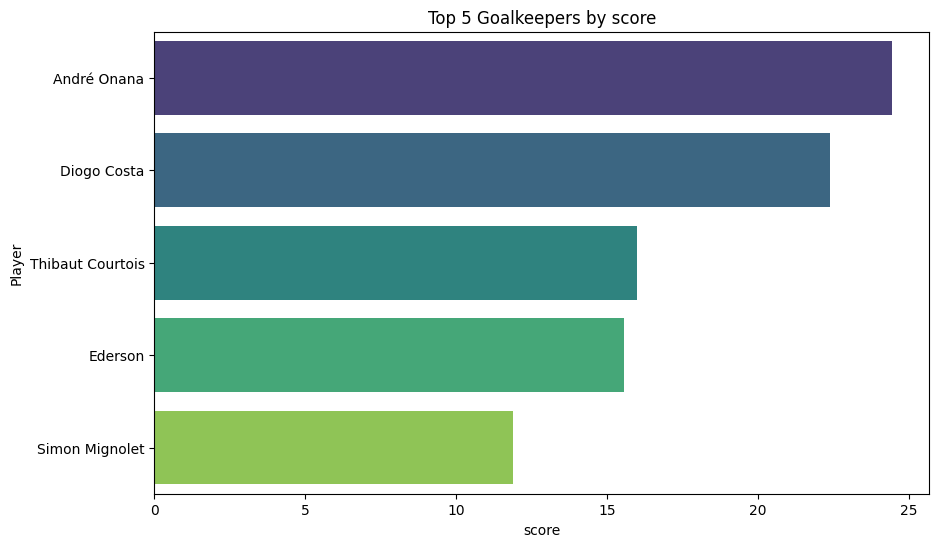

In [47]:
plot_top_players(top_gk, 5, 'Goalkeepers')

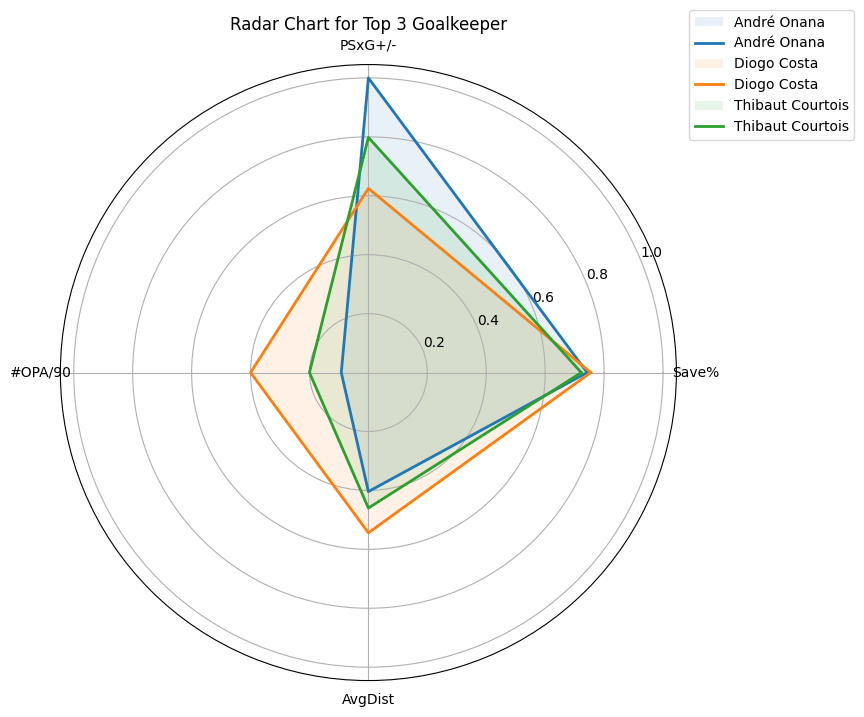

In [48]:
from sklearn.preprocessing import MinMaxScaler

def plot_radar_chart(df, position_title, metrics, top_n=3):
    # Select the top N players
    top_players = df.head(top_n)

    # Extracting the metrics data for scaling
    data_for_scaling = df[metrics]

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the data
    scaled_data = scaler.fit_transform(data_for_scaling)

    # Create a DataFrame for the scaled data
    df_scaled = pd.DataFrame(scaled_data, columns=metrics, index=df.index)

    # Now, select the scaled data for the top N players
    top_n_scaled_data = df_scaled.loc[top_players.index]

    # Radar chart setup
    num_metrics = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # complete the loop

    # Data for radar chart (adding the first metric at the end to close the chart)
    top_n_scaled_data = pd.concat([top_n_scaled_data, top_n_scaled_data.iloc[:, 0]], axis=1)

    # Plotting the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i in range(len(top_players)):
        ax.fill(angles, top_n_scaled_data.iloc[i].values, alpha=0.1, label=top_players.iloc[i]['Player'])
        ax.plot(angles, top_n_scaled_data.iloc[i].values, label=top_players.iloc[i]['Player'], linewidth=2)

    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title(f'Radar Chart for Top {top_n} {position_title}')

    plt.show()

# Usage for Goalkeepers
plot_radar_chart(top_gk, 'Goalkeeper', ['Save%', 'PSxG+/-', '#OPA/90', 'AvgDist'], top_n=3)

In [50]:
def select_top_n_players(df, position, n):
    # Assuming 'score' is the column representing the performance score
    top_2_players = df[df['Position'] == position].nlargest(n, 'score')
    return top_2_players[['Player', 'Club', 'Position', 'score']]

# Usage for Goalkeeper (GK)
top_1_gk = select_top_n_players(top_gk, 'GK', 1)
print("Top Goalkeeper:")
print(top_1_gk)

Top Goalkeeper:
         Player   Club Position      score
33  André Onana  Inter       GK  24.454631
